In [1]:
import cartopy.crs as ccrs
import earthaccess
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from tools import time_from_attr,open_L2_CLOUD_GPC

In [2]:
auth = earthaccess.login(persist=True)

In [3]:
bbox = (-170,-60,-120,-50)

results = earthaccess.search_data(
    short_name="PACE_HARP2_L2_CLOUD_GPC_NRT",
    bounding_box=bbox,
)
print(len(results))

paths = earthaccess.open(results)

186


QUEUEING TASKS | :   0%|          | 0/186 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/186 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/186 [00:00<?, ?it/s]

In [4]:
results[0]

Collection: {'ShortName': 'PACE_HARP2_L2_CLOUD_GPC_NRT', 'Version': '3.0'}
Spatial coverage: {'HorizontalSpatialDomain': {'Geometry': {'GPolygons': [{'Boundary': {'Points': [{'Latitude': -42.25097, 'Longitude': -164.26558}, {'Latitude': -48.12748, 'Longitude': 161.90047}, {'Latitude': -65.65214, 'Longitude': 160.65279}, {'Latitude': -57.90583, 'Longitude': -148.87445}, {'Latitude': -42.25097, 'Longitude': -164.26558}]}}]}}}
Temporal coverage: {'RangeDateTime': {'BeginningDateTime': '2025-07-01T01:29:45Z', 'EndingDateTime': '2025-07-01T01:34:44Z'}}
Size(MB): 3.2702836990356445
Data: ['https://obdaac-tea.earthdatacloud.nasa.gov/ob-cumulus-prod-public/PACE_HARP2.20250701T012945.L2.CLOUD_GPC.V3_0.NRT.nc']

In [5]:
ds = open_L2_CLOUD_GPC(paths[0])
ds

<xarray.Dataset> Size: 1MB
Dimensions:                                           (bins_along_track: 278,
                                                       bins_across_track: 222)
Coordinates:
    latitude                                          (bins_along_track, bins_across_track) float32 247kB ...
    longitude                                         (bins_along_track, bins_across_track) float32 247kB ...
    date                                              datetime64[ns] 8B 2025-...
Dimensions without coordinates: bins_along_track, bins_across_track
Data variables:
    cloud_bow_droplet_effective_radius                (bins_along_track, bins_across_track) float32 247kB ...
    cloud_bow_droplet_effective_variance              (bins_along_track, bins_across_track) float32 247kB ...
    cloud_bow_droplet_number_concentration_adiabatic  (bins_along_track, bins_across_track) float32 247kB ...
    cloud_bow_liquid_water_path                       (bins_along_track, bins_across_track) float32 247kB ...
Attributes: (12/110)
    Conventions:                                            CF-1.10
    acquisition_scheme:                                     4
    att_pitch_start_end_degrees:                            [-0.10171989 -0.1...
    att_roll_start_end_degrees:                             [-0.01183303 -0.1...
    att_time_offset:                                        0.0
    att_yaw_start_end_degrees:                              [-20.5951   -14.6...
    ...                                                     ...
    cloud_rft_lut_file_name:                                /sdps/sdpsoper/Sc...
    cloud_rft_scatt_angle_required_min:                     135.83791174582538
    cloud_rft_scatt_angle_required_max:                     150.0
    cloud_rft_scatt_angle_to_use_lo:                        135.83791174582538
    cloud_rft_scatt_angle_to_use_hi:                        165.0
    cloud_rft_decomposition_size_correlation_required_min:  0.95

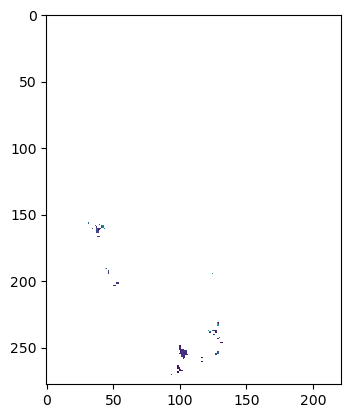

In [6]:
plt.imshow(ds.cloud_bow_droplet_effective_radius)

In [14]:
er = []
ev = []
cdnc = []
lwp = []
lat = []
lon = []
count = 0
for p in paths:

    try: 
        ds = open_L2_CLOUD_GPC(p)
        mask = ~np.isnan(ds.cloud_bow_droplet_effective_radius.data.flatten()) & ~np.isnan(ds.cloud_bow_droplet_effective_variance.data.flatten()) & ~np.isnan(ds.cloud_bow_droplet_number_concentration_adiabatic.data.flatten()) & ~np.isnan(ds.cloud_bow_liquid_water_path.data.flatten())        
        er = np.concatenate((er,ds.cloud_bow_droplet_effective_radius.data.flatten()[mask]))
        ev = np.concatenate((ev,ds.cloud_bow_droplet_effective_variance.data.flatten()[mask]))
        cdnc = np.concatenate((cdnc,ds.cloud_bow_droplet_number_concentration_adiabatic.data.flatten()[mask]))
        lwp = np.concatenate((lwp,ds.cloud_bow_liquid_water_path.data.flatten()[mask]))
    #print(ds.date)
        del(ds)
    except:
        print('I had an error', count)
    count += 1

I had an error 80
I had an error 178


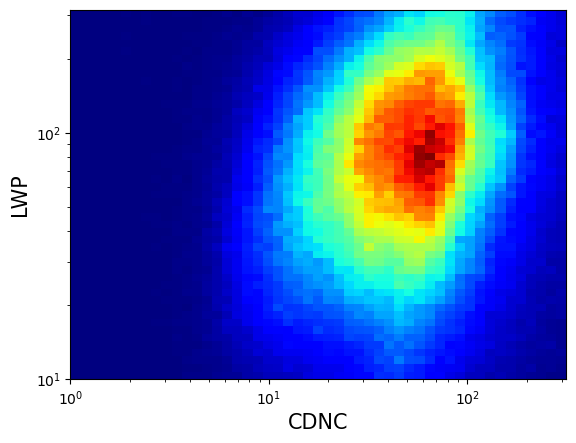

In [113]:
fig,ax = plt.subplots()

cdnc[cdnc==np.nan]=0
lwp[lwp==np.nan]=0

xbins = np.logspace(0,2.5,50) # <- make a range from 10**xmin to 10**xmax
#print(xbins)
ybins = np.logspace(1,2.5,50) # <- make a range from 10**ymin to 10**ymax
#print(xbins,ybins)
h,xedge,yedge,im = ax.hist2d(cdnc,lwp,bins=(xbins,ybins),cmap=plt.cm.jet)
ax.set_xlabel('CDNC',fontsize=15)
ax.set_ylabel(r'LWP',fontsize=15)
ax.set_yscale('log')
ax.set_xscale('log')
#ax.set_title('Density Plot')
plt.show()

In [114]:
h.shape

(49, 49)

In [118]:
h.sum(axis=1,keepdims=True).shape

(49, 1)

In [121]:
h_norm = h/h.sum(axis=1,keepdims=True)
h_norm=np.transpose(h_norm)

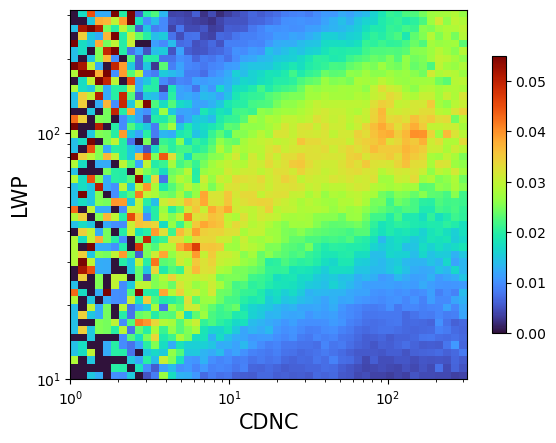

In [135]:

fig,ax = plt.subplots()

xbins = np.logspace(0,2.5,50) # <- make a range from 10**xmin to 10**xmax
#print(xbins)
ybins = np.logspace(1,2.5,50) # <- make a range from 10**ymin to 10**ymax
#print(xbins,ybins)
h,xedge,yedge,im = ax.hist2d(cdnc,lwp,bins=(xbins,ybins))

h_norm = h/h.sum(axis=1,keepdims=True)
h_norm=np.transpose(h_norm)

im = ax.pcolormesh(xedge,yedge,h_norm,cmap='turbo',vmax=0.055)
fig.colorbar(im,shrink=0.75)
ax.set_xlabel('CDNC',fontsize=15)
ax.set_ylabel(r'LWP',fontsize=15)
ax.set_yscale('log')
ax.set_xscale('log')
plt.show()